In [29]:
from yelpapi import YelpAPI
import requests
import pandas as pd
import json
import sys
import re
import warnings
import matplotlib.patches as mpatches
warnings.filterwarnings('ignore')
from datetime import date
from shapely.geometry import Point
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as colors
current_date = date.today().strftime('%Y-%m-%d')

city = 'Fargo'
state = 'ND'

In [2]:
%run yelp_data_scrape.py fargo nd

In [30]:
print("A Restaurant report of "+city+", "+state)

A Restaurant report of Fargo, ND


In [3]:
df = pd.read_csv("./data/"+city+"_Restaurants_"+current_date+".csv")
df = df[['name', 'review_count', 'rating', 'transactions', 'price', 'phone', 'display_phone', 'display_address', 'latitude', 'longitude', 'foodtype']]
df['display_address'] = df['display_address'].apply(lambda x: x.replace("[", "").replace("]", "").replace("'", ""))
df.head()

,name,review_count,rating,transactions,price,phone,display_phone,display_address,latitude,longitude,foodtype
0,Spaghetti Western,19,5.0,NaN,$$,1.701532e+10,(701) 532-4699,"524 Broadway N, Fargo, ND 58102",46.881840,-96.787950,italian
1,Brewhalla,17,4.5,NaN,NaN,1.701532e+10,(701) 532-0506,"1702 1st Ave N, Fargo, ND 58102",46.876509,-96.808752,hotels
2,Brew Bird,123,4.5,pickup,$$,1.701205e+10,(701) 205-0238,"30 N University Dr, Fargo, ND 58102",46.877202,-96.798648,newamerican
3,Mezzaluna,361,4.5,delivery,$$$,1.701365e+10,(701) 364-9479,"309 Roberts St N, Fargo, ND 58102",46.879410,-96.788710,newamerican
4,Porter Creek Hardwood Grill,169,4.0,"pickup, delivery",$$,1.701369e+10,(701) 369-3669,"1555 44th St S, Fargo, ND 58103",46.857563,-96.860969,newamerican


Warning 1: +init=epsg:XXXX syntax is deprecated. It might return a CRS with a non-EPSG compliant axis order.


Total Number of Restaurants in Fargo: 495


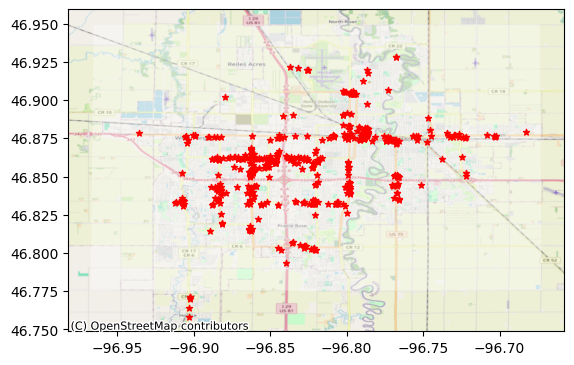

In [4]:
#Plot a map of Restaurants
geometry = [Point(xy) for xy in zip(df['longitude'],df['latitude'])]

wardlink = "./geodata/Fargo-Moorhead_Area-polygon.shp"

ward = gpd.read_file(wardlink, bbox=None, mask=None, rows=None)
geo_df = gpd.GeoDataFrame(geometry = geometry)

ward.crs = {'init':"epsg:4326"}
geo_df.crs = {'init':"epsg:4326"}

ax = ward.plot(alpha=0.35, color='#ffffff', zorder=1)
ax = geo_df.plot(ax = ax, markersize = 20, color = 'red',marker = '*',label = city, zorder=3)
ctx.add_basemap(ax, crs=geo_df.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
print("Total Number of Restaurants in "+city+": "+str(len(df)))
plt.show()

In [5]:
ratings = df.sort_values(['rating', 'review_count'], ascending=[False, False])
ratings = ratings[ratings['review_count'] != 0]
print("Top Ten highest rated restaurants in "+city+":")
ratings.head(10)

Top Ten highest rated restaurants in Fargo:


,name,review_count,rating,transactions,price,phone,display_phone,display_address,latitude,longitude,foodtype
42,GP’s Greek Kitchen,103,5.0,delivery,$$,1.701640e+10,(701) 639-7232,"2553 Kirsten Ln S, Ste 206, Fargo, ND 58104",46.832010,-96.821465,greek
57,Madina Cuisine,56,5.0,delivery,$,1.701235e+10,(701) 235-0504,"2225 13th Ave S, Fargo, ND 58103",46.862019,-96.817610,african
30,ThaiKota,41,5.0,delivery,NaN,1.701212e+10,(701) 212-4851,"1201 1st Ave N, Fargo, ND 58102",46.877716,-96.797468,thai
146,Tea and Crepe,28,5.0,"pickup, delivery",NaN,1.701541e+10,(701) 540-6737,"72 Broadway N, Fargo, ND 58102",46.876738,-96.787950,icecream
78,Newroz Kebab,22,5.0,"pickup, delivery",NaN,1.218228e+10,(218) 227-5019,"2501 8th St S, Moorhead, MN 56560",46.850661,-96.768806,kebab
124,Mehl's Gluten-Free Bakery,21,5.0,NaN,$$,1.701205e+10,(701) 205-4174,"1404 33rd St S, Ste H, Fargo, ND 58103",46.858765,-96.831940,cupcakes
0,Spaghetti Western,19,5.0,NaN,$$,1.701532e+10,(701) 532-4699,"524 Broadway N, Fargo, ND 58102",46.881840,-96.787950,italian
51,Tati's Mediterranean Saveur,9,5.0,"pickup, delivery",NaN,1.701532e+10,(701) 532-4545,"3150 Sheyenne St, Ste 170, West Fargo, ND 58078",46.834110,-96.906160,lebanese
8,Soho23 Korean & Japanese Cuisine,8,5.0,NaN,NaN,1.701237e+10,(701) 237-0779,"1450 25th St S, Fargo, ND 58103",46.859594,-96.818424,japanese
219,Hi-Ho Burgers & Brews,8,5.0,delivery,$,1.218287e+10,(218) 287-2975,"10 Center Ave E, Dilworth, MN 56529",46.876820,-96.702270,burgers


In [6]:
print("Top Ten lowest rated restaurants in "+city+":")
ratings.tail(10)

Top Ten lowest rated restaurants in Fargo:


,name,review_count,rating,transactions,price,phone,display_phone,display_address,latitude,longitude,foodtype
357,New Gyro,2,1.0,"pickup, delivery",NaN,1.701278e+10,(701) 277-5099,"855 45th St S, Ste A2, Fargo, ND 58103",46.867755,-96.862778,food_court
430,Subway,2,1.0,NaN,$,1.701356e+10,(701) 356-0920,"3757 55th Ave S, Fargo, ND 58104",46.802265,-96.842661,sandwiches
478,Casey's,2,1.0,delivery,NaN,1.701277e+10,(701) 277-4389,"4405 45th St S, Fargo, ND 58104",46.814130,-96.862301,pizza
116,Hen House Bar & Restaurant,1,1.0,NaN,NaN,1.218359e+10,(218) 359-0744,"935 37th Ave S, Ste 136, Moorhead, MN 56560",46.834867,-96.765543,sandwiches
224,Fargo Fillies,1,1.0,NaN,NaN,1.218443e+10,(218) 443-2433,"Fargo, ND 58103",46.858734,-96.821808,foodtrucks
337,Sbc Deli,1,1.0,NaN,NaN,1.701373e+10,(701) 373-0028,"122 23rd St S, Fargo, ND 58103",46.874146,-96.816124,delis
389,Red River Lanes Bowling Center,1,1.0,NaN,NaN,1.701235e+10,(701) 235-1171,"707 28th Ave N, Fargo, ND 58102",46.912524,-96.789123,bowling
406,Casey's,1,1.0,delivery,NaN,1.701281e+10,(701) 281-3091,"204 42nd St S, Fargo, ND 58103",46.873894,-96.850059,pizza
489,Papa Johns Pizza,1,1.0,"pickup, delivery",$,1.701238e+10,(701) 237-9999,"1100 19th Ave N, Unit N, Fargo, ND 58102",46.904156,-96.795388,pizza
490,Subway,1,1.0,delivery,$,1.218234e+10,(218) 233-5972,"201 34th St N, Moorhead, MN 56560",46.877612,-96.726425,sandwiches


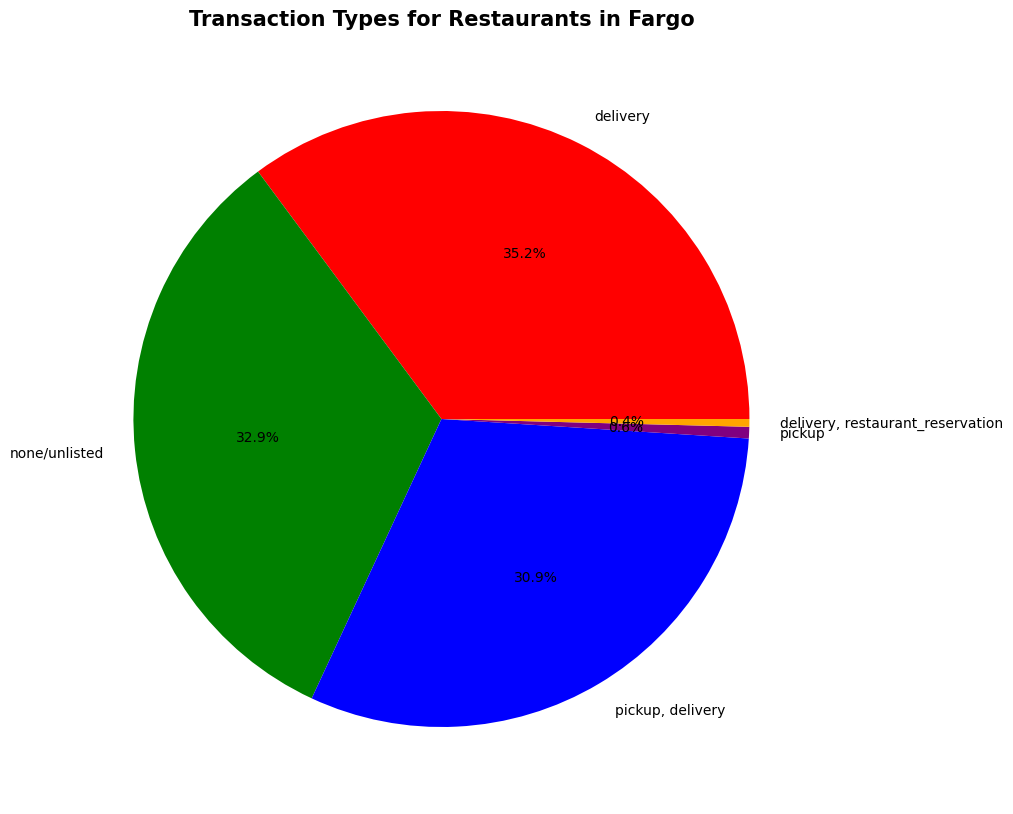

In [7]:
df['transactions'] = df['transactions'].fillna('none/unlisted')
transactions_df = df["transactions"].value_counts()
transactions_df.plot.pie(figsize=(15, 10), autopct='%1.1f%%', colors=['red', 'green', 'blue', 'purple', 'orange', 'pink', 'yellow'])
plt.title("Transaction Types for Restaurants in "+city, fontdict={'size': 15, 'weight': 'bold'})
plt.ylabel("")
plt.show()

In [8]:
#convert food types
def map_foodtypes(foodtype):
    if foodtype == "restaurants":
        return 'miscellaneous'
    elif foodtype == "tacos":
        return 'mexican'
    elif foodtype == "burgers" or foodtype == "chicken_wings" or foodtype == "tradamerican" or foodtype == "newamerican":
        return 'american'
    if foodtype == "sandwiches" or foodtype == "soup":
        return 'soup_sandwich'
    elif foodtype == "breakfast_brunch":
        return 'breakfast'
    if foodtype == "sportsbars" or foodtype == "cocktailbars" or foodtype == "wine_bars":
        return 'bars'
    elif foodtype == "ramen":
        return 'noodles'    
    elif foodtype == "irish_pubs" or foodtype == "gastropubs":
        return 'pubs'  
    elif foodtype == "bagels":
        return 'bakeries'
    elif foodtype == "cupcakes" or foodtype == "donuts":
        return 'desserts' 
    elif foodtype == "asianfusion":
        return 'asian' 
    elif foodtype == "egyptian" or foodtype == "lebanese":
        return 'mideastern'
    elif foodtype == "cheesesteaks":
        return 'steak'  
    elif foodtype == "danceclubs" or foodtype == "nightclubs":
        return 'nightlife'     
    else:
        return foodtype

# apply the function to create the new column
df["foodtype"] = df["foodtype"].apply(map_foodtypes)

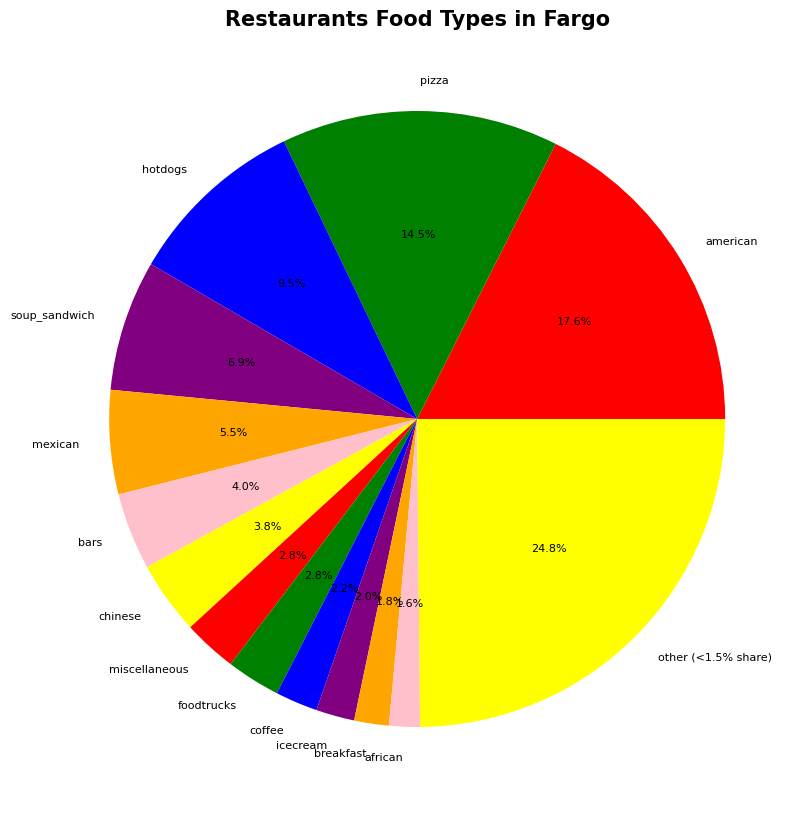

In [9]:
#create pie chart of food types
foodtype_count = df["foodtype"].value_counts()

# create new category that groups builders making up <2% of total
total = foodtype_count.sum()
threshold = 0.015

foodtype_percent = foodtype_count/foodtype_count.sum()
other_percent = foodtype_percent[foodtype_percent < threshold].sum()
foodtype_percent = foodtype_percent[foodtype_percent >= threshold]
foodtype_percent["other (<1.5% share)"] = other_percent
foodtype_percent.plot.pie(figsize=(15, 10), autopct='%1.1f%%', colors=['red', 'green', 'blue', 'purple', 'orange', 'pink', 'yellow'], textprops={'fontsize': 8})
plt.title("Restaurants Food Types in "+city, fontdict={'size': 15, 'weight': 'bold'})
plt.ylabel("")
plt.show()

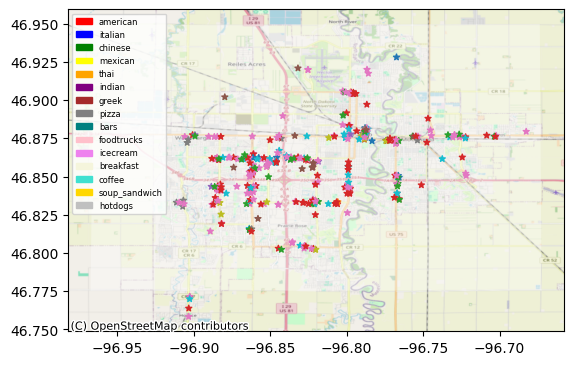

In [10]:
colormap = {
'american': 'red',
'italian': 'blue',
'chinese': 'green',
'mexican': 'yellow',
'thai': 'orange',
'indian': 'purple',
'greek': 'brown',
'pizza': 'gray',
'bars': 'teal',
'foodtrucks': 'pink',
'icecream': 'violet',
'breakfast': 'beige',
'coffee': 'turquoise',
'soup_sandwich': 'gold',
'hotdogs': 'silver'
}

geo_df['color'] = df['foodtype'].map(colormap)


legend_patches = [mpatches.Patch(color=color, label=food_type) for food_type, color in colormap.items()]

ax = ward.plot(alpha=0.35, color='#ffffff', zorder=1)
ax = geo_df.plot(ax=ax, markersize=20, column='color', marker='*', label=city, zorder=3)
ctx.add_basemap(ax, crs=geo_df.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
plt.legend(handles=legend_patches, loc="upper left", prop={'size': 6})
plt.show()

In [11]:
#convert price to word format
def map_price(price):
    if price == "$":
        return 'Low'
    elif price == "$$":
        return 'Medium'
    elif price == "$$$":
        return 'High'
    elif price == "$$$$":
        return 'Very High'
    elif price == "None":
        return 'Unlisted'
    else:
        return price

# apply the function to create the new column
df["price_val"] = df["price"].apply(map_price)
price_count = df["price_val"].value_counts()
price_count

Low          144
Medium       134
High           7
Very High      1
Name: price_val, dtype: int64

Note: This chart doesn't include restaurants where the price wasn't listed


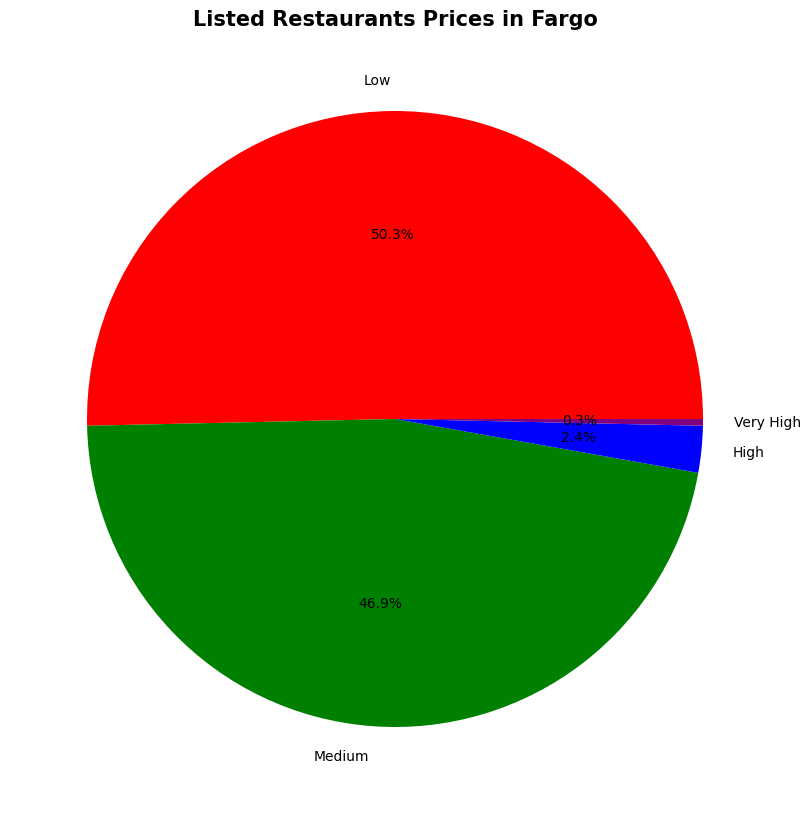

In [12]:
price_count.plot.pie(figsize=(15, 10), autopct='%1.1f%%', colors=['red', 'green', 'blue', 'purple', 'orange', 'pink', 'yellow'])
plt.title("Listed Restaurants Prices in "+city, fontdict={'size': 15, 'weight': 'bold'})
plt.ylabel("")
print("Note: This chart doesn't include restaurants where the price wasn't listed")
plt.show()

In [13]:
# Group by foodtype and calculate the mean rating
average_rating = df.groupby('foodtype')['rating'].mean()
average_rating = pd.DataFrame(average_rating)
average_rating = pd.merge(average_rating, df.groupby('foodtype')['review_count'].sum(), on='foodtype')
average_rating = average_rating[average_rating['review_count'] != 0]
average_rating = average_rating.sort_values(['rating'], ascending=[False])

restaurant_count = df["foodtype"].value_counts()
restaurant_count = pd.DataFrame(restaurant_count)
restaurant_count

average_rating = pd.merge(average_rating, restaurant_count, left_index=True, right_index=True)
average_rating = average_rating.rename(columns={'foodtype': 'restaurant_count'}) 
print(average_rating)

                   rating  review_count  restaurant_count
kebab            5.000000            22                 1
french           5.000000             4                 1
hotels           4.750000            18                 2
greek            4.750000           153                 2
desserts         4.500000           314                 4
asian            4.500000            18                 1
diners           4.500000            55                 2
thai             4.375000           244                 4
indpak           4.375000           483                 4
vietnamese       4.333333           235                 3
bakeries         4.333333           311                 3
hotdog           4.250000             3                 2
fishnchips       4.166667           361                 3
japanese         4.100000           283                 5
african          4.062500           116                 8
mediterranean    4.000000            34                 1
tapasmallplate

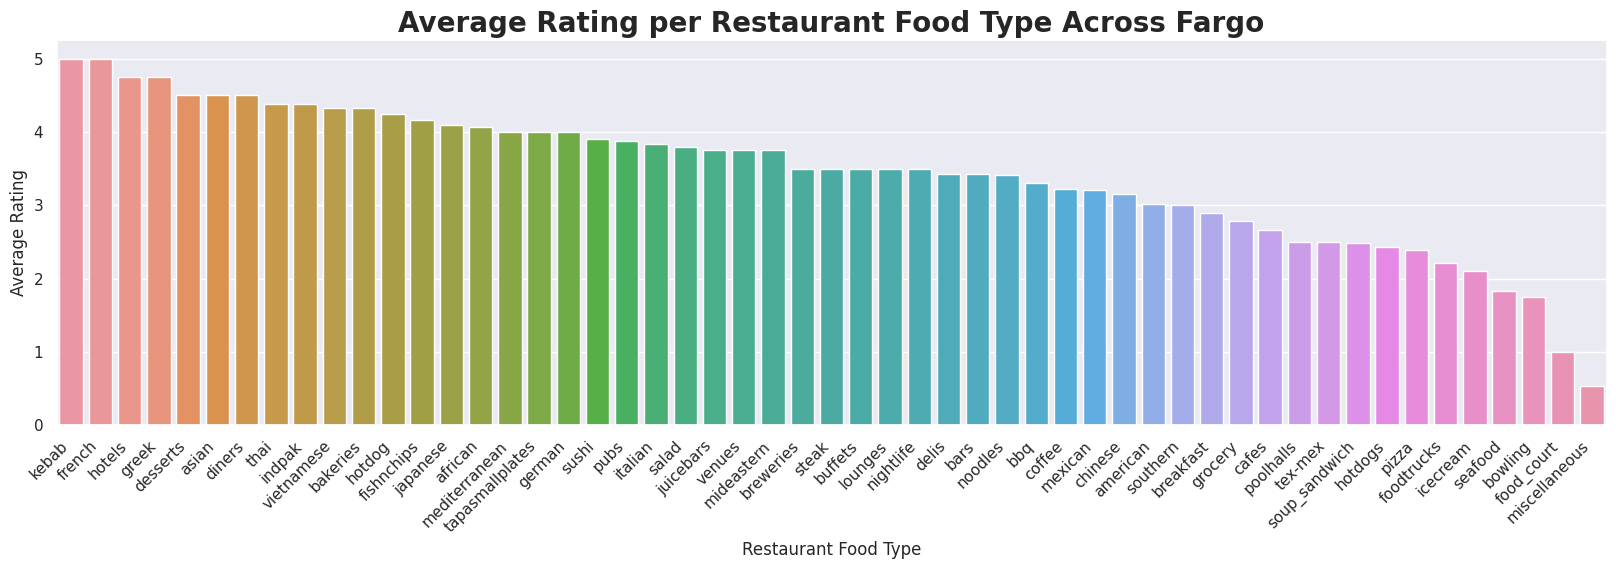

In [14]:
sns.set(rc={"figure.figsize":(20, 5)})
rating_barplot = sns.barplot(x = average_rating.index, y = 'rating', data = average_rating)
plt.xlabel('Restaurant Food Type')
plt.ylabel('Average Rating')
rating_barplot.set_xticklabels(rating_barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Average Rating per Restaurant Food Type Across '+ city, fontdict={'size': 20, 'weight': 'bold'})
plt.show()

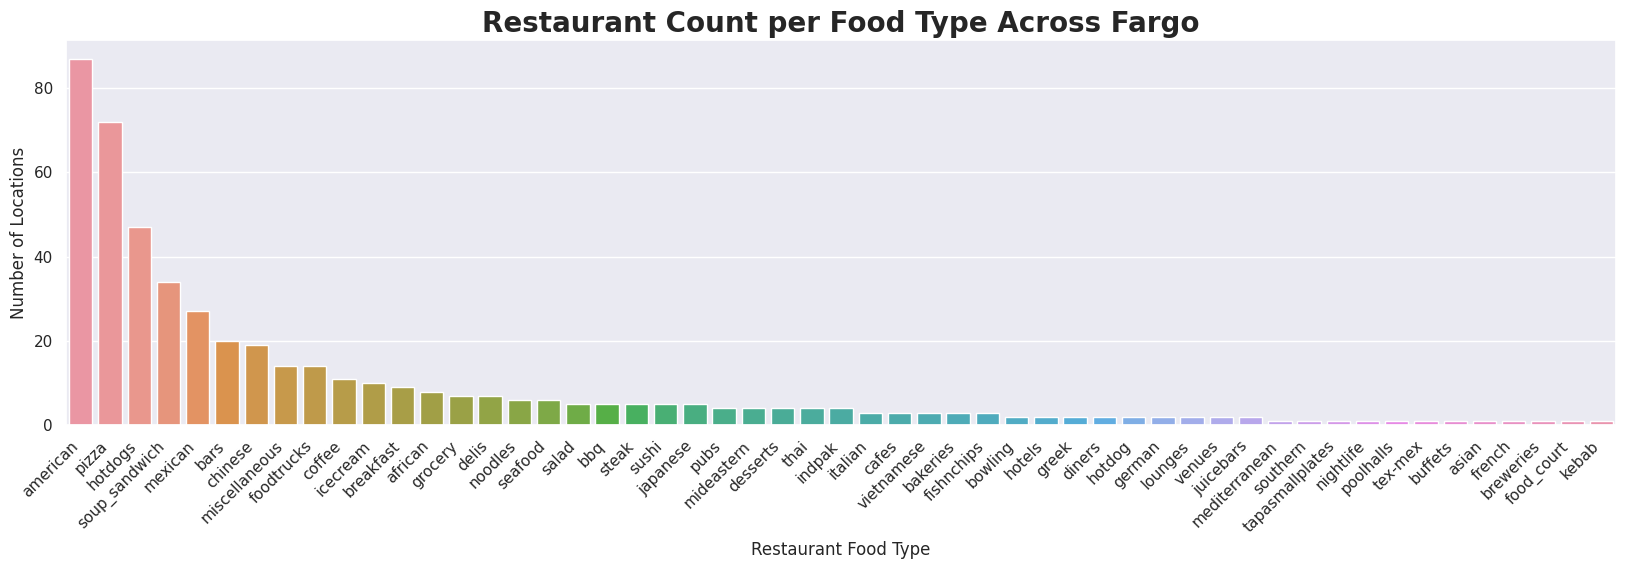

In [15]:
average_rating = average_rating.sort_values(['restaurant_count'], ascending=[False])
sns.set(rc={"figure.figsize":(20, 5)})
rating_barplot = sns.barplot(x = average_rating.index, y = 'restaurant_count', data = average_rating)
plt.xlabel('Restaurant Food Type')
plt.ylabel('Number of Locations')
rating_barplot.set_xticklabels(rating_barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Restaurant Count per Food Type Across '+ city, fontdict={'size': 20, 'weight': 'bold'})
plt.show()

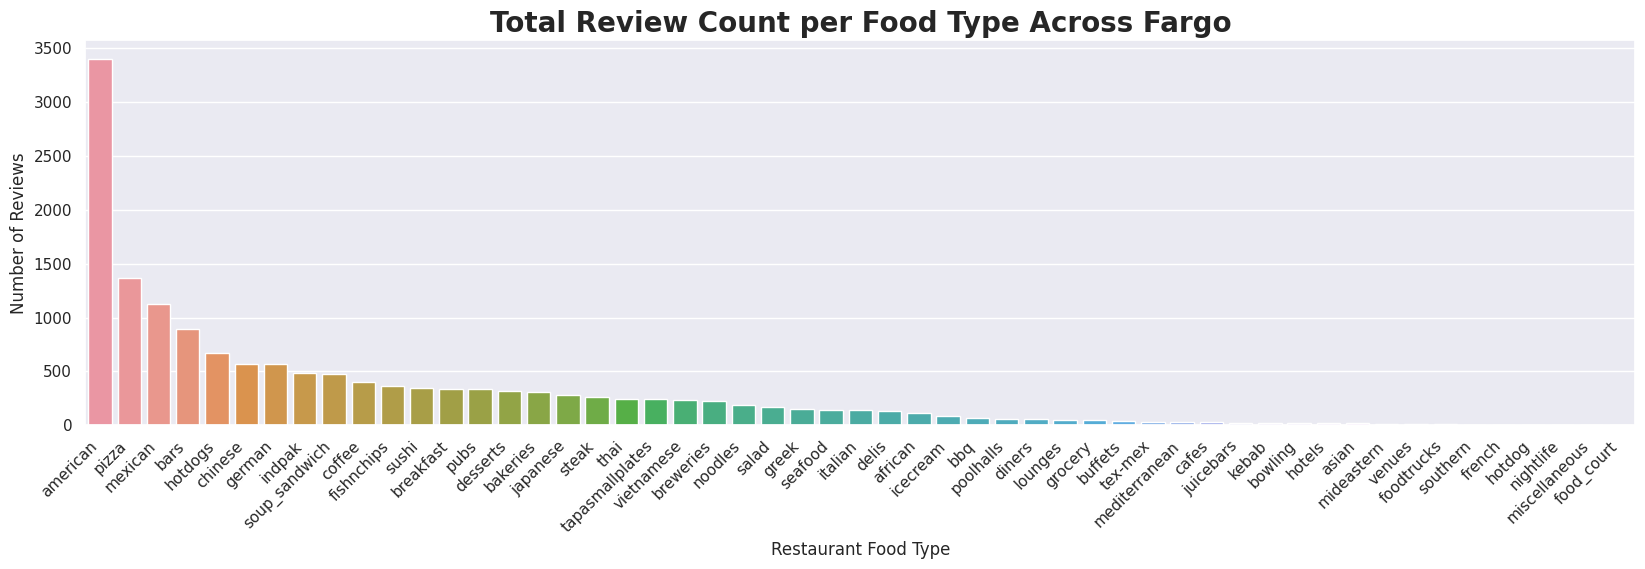

In [16]:
average_rating = average_rating.sort_values(['review_count'], ascending=[False])
sns.set(rc={"figure.figsize":(20, 5)})
rating_barplot = sns.barplot(x = average_rating.index, y = 'review_count', data = average_rating)
plt.xlabel('Restaurant Food Type')
plt.ylabel('Number of Reviews')
rating_barplot.set_xticklabels(rating_barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Total Review Count per Food Type Across '+ city, fontdict={'size': 20, 'weight': 'bold'})
plt.show()

In [18]:
df = df.sort_values(['price'], ascending=[False])
print("Top Ten most expensive restaurants in "+city+":")
df.head(10)

Top Ten most expensive restaurants in Fargo:


,name,review_count,rating,transactions,price,phone,display_phone,display_address,latitude,longitude,foodtype,price_val
293,Papa Murphy's,7,3.5,none/unlisted,$$$$,1.701366e+10,(701) 365-8282,"4501 15th Avenue South, Suite 111, Fargo, ND 5...",46.858880,-96.863200,pizza,Very High
60,Urban 42,37,3.0,pickup,$$$,1.701282e+10,(701) 281-7105,"1635 42nd St S, Fargo, ND 58103",46.856350,-96.852390,american,High
31,Maxwells Restaurant & Bar,125,4.5,delivery,$$$,1.701278e+10,(701) 277-9463,"1380 9th St E, West Fargo, ND 58078",46.860901,-96.883655,american,High
354,Hornbacher's Foods,6,3.0,none/unlisted,$$$,1.701280e+10,(701) 280-1999,"1532 32nd Ave S, Ste 3, Fargo, ND 58103",46.832104,-96.802655,grocery,High
15,Rustica Eatery & Tavern,162,4.5,"delivery, restaurant_reservation",$$$,1.218228e+10,(218) 227-5388,"315 Main Ave, Moorhead, MN 56560",46.873564,-96.774261,soup_sandwich,High
185,O'kelly's Tastes & Toddies,8,3.0,delivery,$$$,1.701277e+10,(701) 277-1880,"3800 Main Ave, Fargo, ND 58103",46.874910,-96.842810,bars,High
3,Mezzaluna,361,4.5,delivery,$$$,1.701365e+10,(701) 364-9479,"309 Roberts St N, Fargo, ND 58102",46.879410,-96.788710,american,High
88,Cork 'N Cleaver,60,3.0,delivery,$$$,1.701238e+10,(701) 237-6790,"3301 S University Dr, Fargo, ND 58104",46.830587,-96.801064,steak,High
53,Deaner's Diner,43,4.5,delivery,$$,1.701278e+10,(701) 277-7062,"405 Main Ave W, 5E, West Fargo, ND 58078",46.876051,-96.905845,american,Medium
83,Mahana Fresh,12,4.0,"pickup, delivery",$$,1.701532e+10,(701) 532-1172,"3985 56th St S, Unit F, Fargo, ND 58104",46.819381,-96.881763,american,Medium
